### Loading Data & Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Telco-Customer-Churn.csv")

### Show Sample Of Data

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Show More Info

In [4]:
data.shape

(7043, 21)

In [5]:
# show all column name

data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
data.duplicated().any()

False

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### Above cells' conclusion

- Dataset no missing values
- Dataset has no complete duplicates
- We need to remove some columns not use
- We need to modify some column datatype

## Cleaning

In [10]:
# remove customerID column

data.drop(columns = ["customerID"], inplace = True)

In [11]:
data.sample(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
999,Male,0,No,No,2,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,No,Electronic check,70.30,132.4,No
619,Female,0,No,No,7,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),78.55,522.95,No
3060,Male,0,Yes,No,25,No,No phone service,DSL,No,No,Yes,No,Yes,No,One year,Yes,Credit card (automatic),38.10,970.4,No


In [12]:
# set visualizetion style

sns.set_style("darkgrid")
sns.set_palette("RdBu")

###  Discovering `gender` column

In [13]:
# show unique values

data["gender"].unique()

array(['Female', 'Male'], dtype=object)

In [14]:
# output value counts of each unique values

data["gender"].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

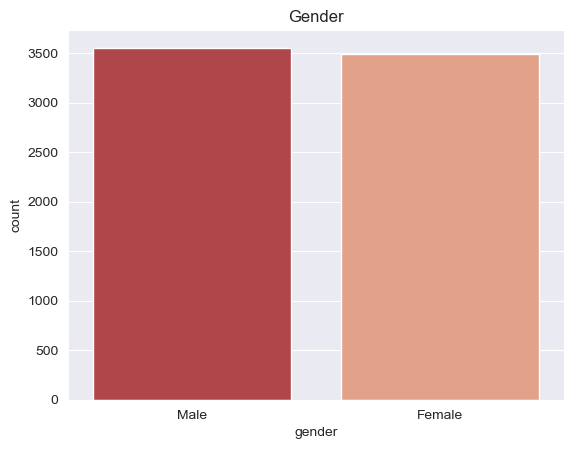

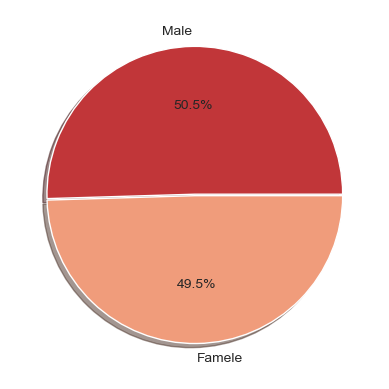

In [15]:
# visualized gender column

# 1- create countplot 
sns.countplot(x = "gender", data = data, order = ["Male", "Female"])
sns.set_style("whitegrid")
plt.title("Gender")
plt.show()

# 2- create pie chere
gender_number = data.gender.value_counts().tolist()
gender = ["Male", "Famele"]
plt.pie(gender_number, labels = gender, shadow = True, autopct = "%1.1f%%", explode = [0,0.01])
plt.show()

- #### Male is the most customer’s gender 

### Discovering `SeniorCitizen` column

In [16]:
# convert SeniorCitizen type to categorical

data["SeniorCitizen"] = data["SeniorCitizen"].astype("category")

In [17]:
# show unique values

data["SeniorCitizen"].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [18]:
# output value counts of each unique values

data["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [19]:
# make some modification

data["SeniorCitizen"].replace({1 : "Yes", 0 : "NO"}, inplace = True)

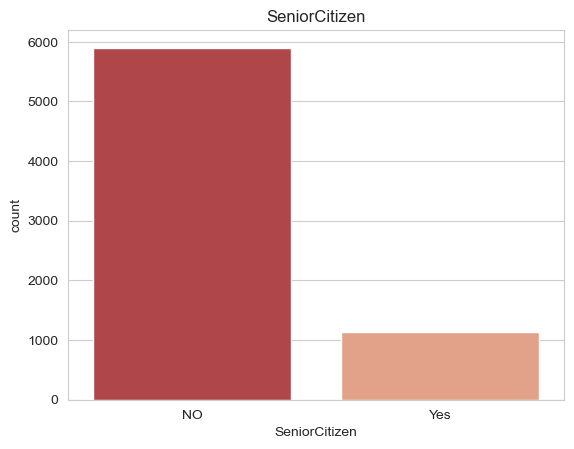

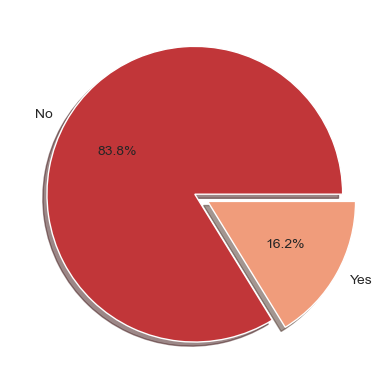

In [21]:
# visualized SeniorCitizen column

# 1- create countplot 
sns.countplot(x = "SeniorCitizen", data = data, order = data.SeniorCitizen.value_counts().index)
sns.set_style("whitegrid")
plt.title("SeniorCitizen")
plt.show()

# 2- create pie chere
Senior = data.SeniorCitizen.value_counts().tolist()
categorical  = ["No", "Yes"]
plt.pie(Senior, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.1])
plt.show()

- #### Most customer’s is not a senior citizen 

### Discovering `Partner` column

In [22]:
# show unique values

data["Partner"].unique()

array(['Yes', 'No'], dtype=object)

In [23]:
# output value counts of each unique values

data["Partner"].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

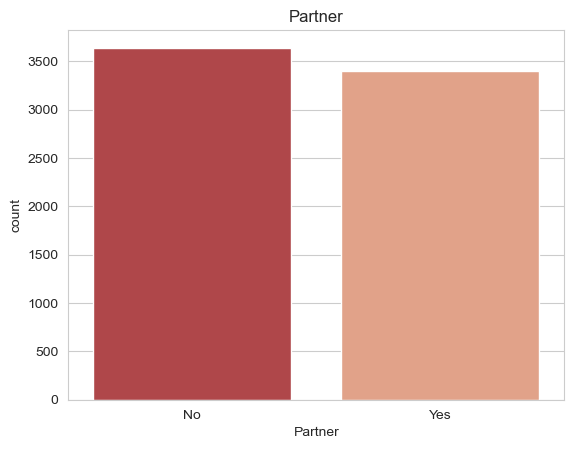

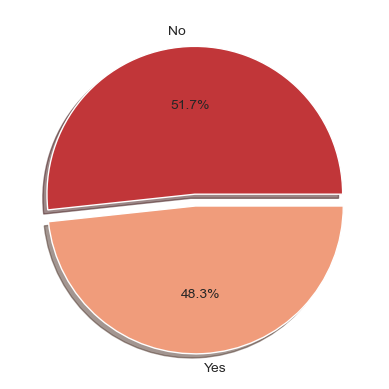

In [24]:
# visualized Partner column

# 1- create countplot 
sns.countplot(x = "Partner", data = data, order = data.Partner.value_counts().index)
sns.set_style("whitegrid")
plt.title("Partner")
plt.show()

# 2- create pie chere
Senior = data.Partner.value_counts().tolist()
categorical  = ["No", "Yes"]
plt.pie(Senior, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.08])
plt.show()

- #### Most customers don't have a partner

### Discovering `Dependents` column

In [25]:
# show unique values

data["Dependents"].unique()

array(['No', 'Yes'], dtype=object)

In [26]:
# output value counts of each unique values

data["Dependents"].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

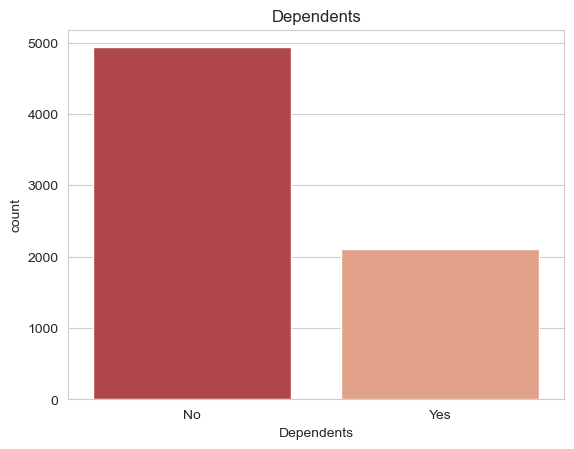

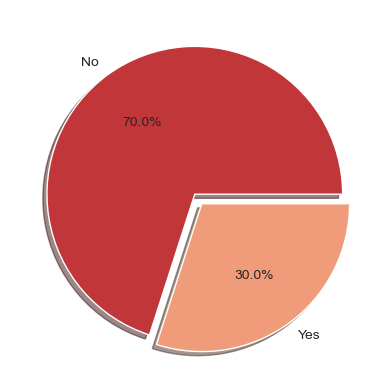

In [27]:
# visualized Dependents column

# 1- create countplot 
sns.countplot(x = "Dependents", data = data, order = data.Dependents.value_counts().index)
sns.set_style("whitegrid")
plt.title("Dependents")
plt.show()

# 2- create pie chere
Dependents = data.Dependents.value_counts().tolist()
categorical  = ["No", "Yes"]
plt.pie(Dependents, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.08])
plt.show()

- #### Most customer’s don't have dependents
- #### 30.0% of customer’s under 18 years 

### Discovering `PhoneService` column

In [28]:
# show unique values

data["PhoneService"].unique()

array(['No', 'Yes'], dtype=object)

In [29]:
# output value counts of each unique values

data["PhoneService"].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

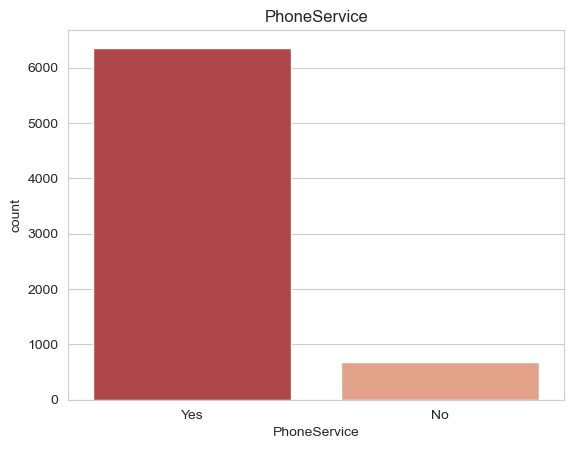

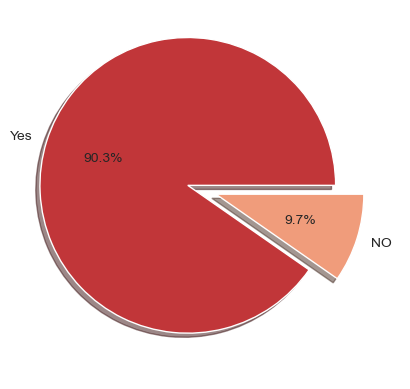

In [30]:
# visualized PhoneService column

# 1- create countplot 
sns.countplot(x = "PhoneService", data = data, order = data.PhoneService.value_counts().index)
sns.set_style("whitegrid")
plt.title("PhoneService")
plt.show()

# 2- create pie chere
Service = data.PhoneService.value_counts().tolist()
categorical  = ["Yes", "NO"]
plt.pie(Service, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.2, 0])
plt.show()

- #### Most customer’s has a phone service 

### Discovering `MultipleLines` column

In [31]:
# show unique values

data["MultipleLines"].unique()

array(['No phone service', 'No', 'Yes'], dtype=object)

In [32]:
# output value counts of each unique values

data["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

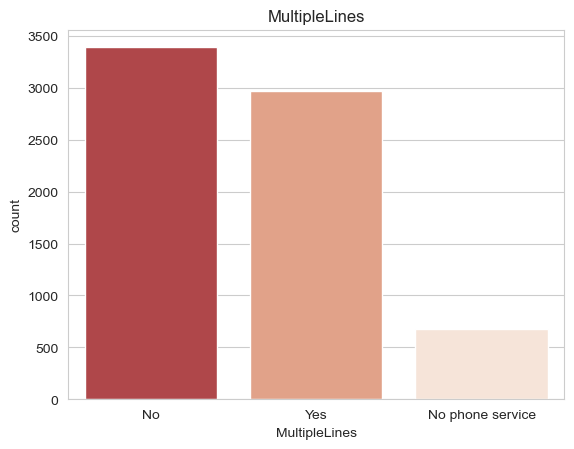

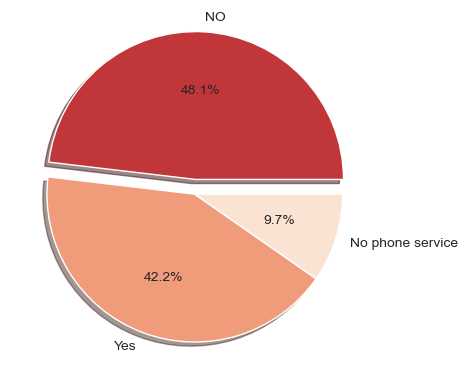

In [33]:
# visualized MultipleLines column

# 1- create countplot 
sns.countplot(x = "MultipleLines", data = data, order = data.MultipleLines.value_counts().index)
sns.set_style("whitegrid")
plt.title("MultipleLines")
plt.show()

# 2- create pie chere
Lines = data.MultipleLines.value_counts().tolist()
categorical  = ["NO", "Yes", "No phone service"]
plt.pie(Lines, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

### 90.3% customer’s has a phone service
- #### 42.2% has MultipleLines

### Discovering `InternetService` column

In [34]:
# show unique values

data["InternetService"].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [35]:
# output value counts of each unique values

data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

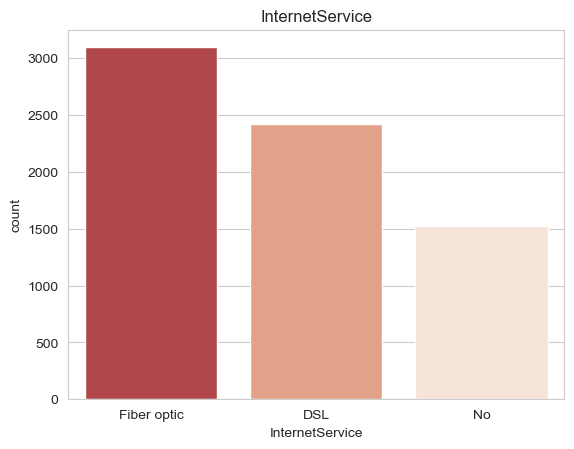

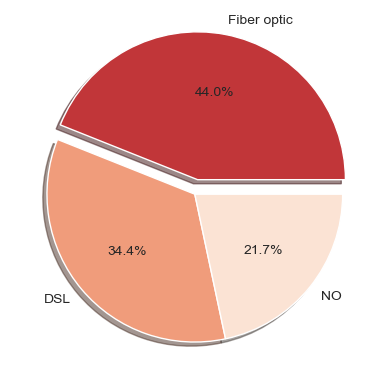

In [36]:
# visualized InternetService column

# 1- create countplot 
sns.countplot(x = "InternetService", data = data, order = data.InternetService.value_counts().index)
sns.set_style("whitegrid")
plt.title("InternetService")
plt.show()

# 2- create pie chere
Service = data.InternetService.value_counts().tolist()
categorical  = ["Fiber optic", "DSL", "NO"]
plt.pie(Service, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

### 90.3% customer’s has a phone service
- 78.4% has InternetService
- Most customer’s has `fiber optic` service

### Discovering `OnlineSecurity` column

In [37]:
# show unique values

data["OnlineSecurity"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [38]:
# output value counts of each unique values

data["OnlineSecurity"].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

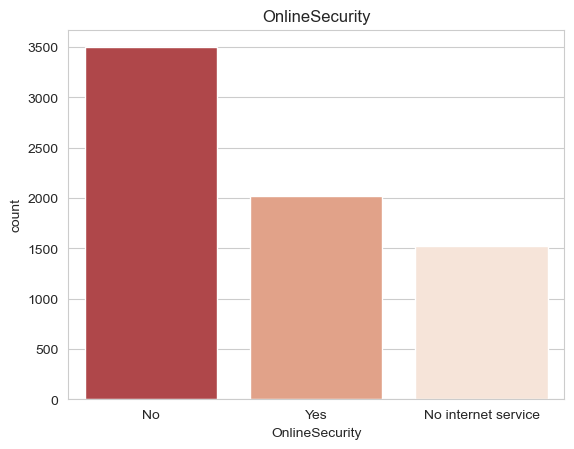

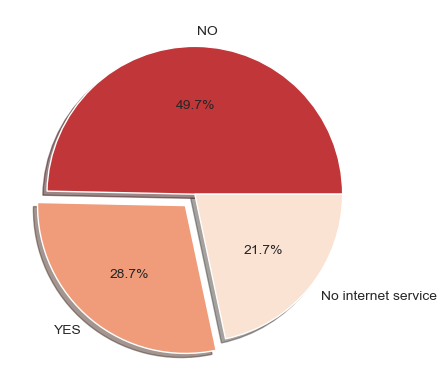

In [39]:
# visualized OnlineSecurity column

# 1- create countplot 
sns.countplot(x = "OnlineSecurity", data = data, order = data.OnlineSecurity.value_counts().index)
sns.set_style("whitegrid")
plt.title("OnlineSecurity")
plt.show()

# 2- create pie chere
Security = data.OnlineSecurity.value_counts().tolist()
categorical  = ["NO", "YES", "No internet service"]
plt.pie(Security, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.1,0])
plt.show()

### 78.4% customer’s has InternetService
- Most customers saw Internet Service has no security

### Discovering `OnlineBackup` column

In [40]:
# show unique values

data["OnlineBackup"].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

In [41]:
# output value counts of each unique values

data["OnlineBackup"].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

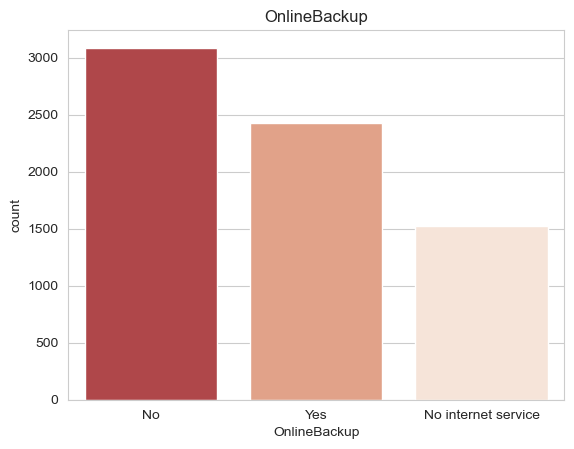

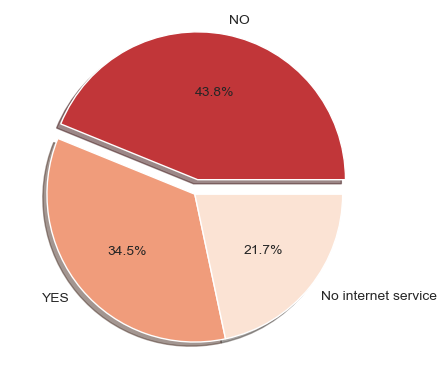

In [42]:
# visualized OnlineBackup column

# 1- create countplot 
sns.countplot(x = "OnlineBackup", data = data, order = data.OnlineBackup.value_counts().index)
sns.set_style("whitegrid")
plt.title("OnlineBackup")
plt.show()

# 2- create pie chere
Backup = data.OnlineBackup.value_counts().tolist()
categorical  = ["NO", "YES", "No internet service"]
plt.pie(Backup, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most customers don't have online backup

### Discovering `DeviceProtection` column

In [43]:
# show unique values

data["DeviceProtection"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [44]:
# output value counts of each unique values

data["DeviceProtection"].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

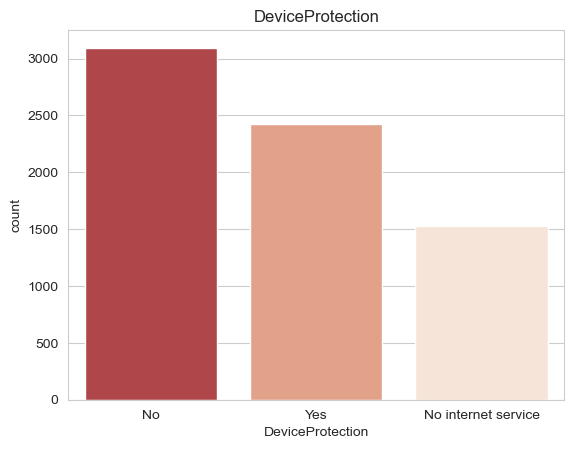

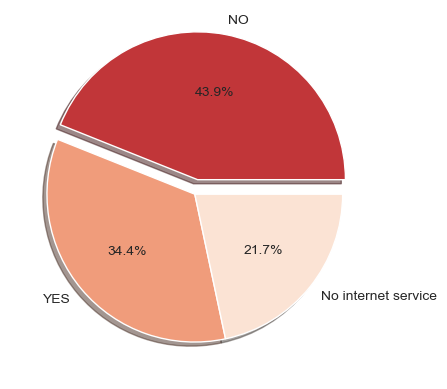

In [45]:
# visualized DeviceProtection column

# 1- create countplot 
sns.countplot(x = "DeviceProtection", data = data, order = data.DeviceProtection.value_counts().index)
sns.set_style("whitegrid")
plt.title("DeviceProtection")
plt.show()

# 2- create pie chere
Protection = data.DeviceProtection.value_counts().tolist()
categorical  = ["NO", "YES", "No internet service"]
plt.pie(Protection, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most customer don't have device protection

### Discovering `TechSupport` column

In [46]:
# show unique values

data["TechSupport"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [47]:
# output value counts of each unique values

data["TechSupport"].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

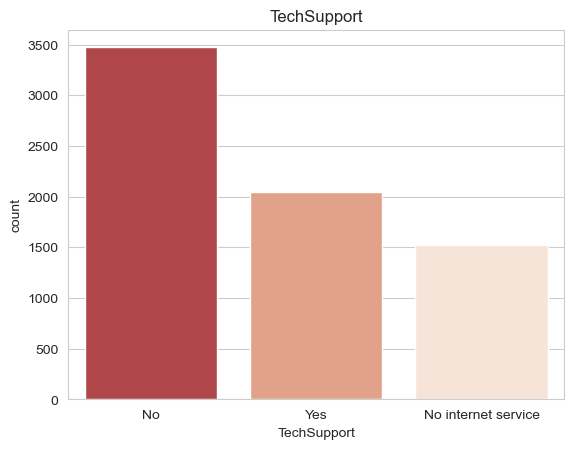

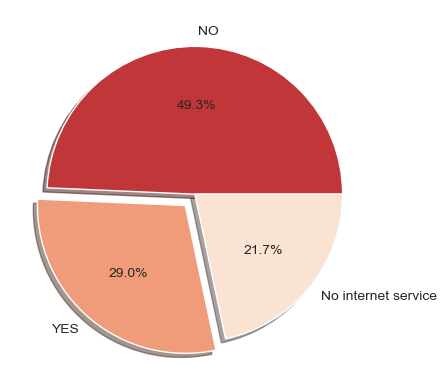

In [48]:
# visualized TechSupport column

# 1- create countplot 
sns.countplot(x = "TechSupport", data = data, order = data.TechSupport.value_counts().index)
sns.set_style("whitegrid")
plt.title("TechSupport")
plt.show()

# 2- create pie chere
support = data.TechSupport.value_counts().tolist()
categorical  = ["NO", "YES", "No internet service"]
plt.pie(support, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.1,0])
plt.show()

- #### Most customer don't have tech support

### Discovering `StreamingTV` column

In [49]:
# show unique values

data["StreamingTV"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [50]:
# output value counts of each unique values

data["StreamingTV"].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

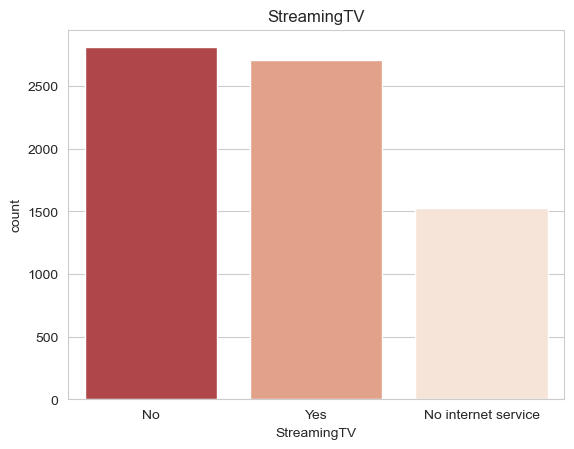

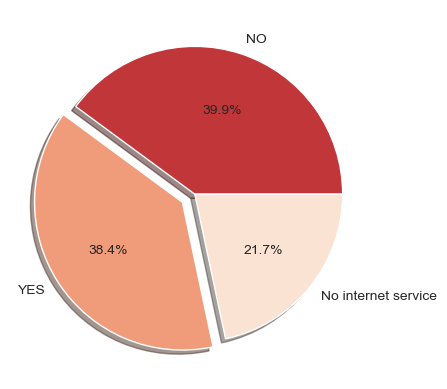

In [51]:
# visualized StreamingTV column

# 1- create countplot 
sns.countplot(x = "StreamingTV", data = data, order = data.StreamingTV.value_counts().index)
sns.set_style("whitegrid")
plt.title("StreamingTV")
plt.show()

# 2- create pie chere
TV = data.StreamingTV.value_counts().tolist()
categorical  = ["NO", "YES", "No internet service"]
plt.pie(TV, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.1,0])
plt.show()

- #### Most customer don't  streaming TV

### Discovering `StreamingMovies` column

In [52]:
# show unique values

data["StreamingMovies"].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [53]:
# output value counts of each unique values

data["StreamingMovies"].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

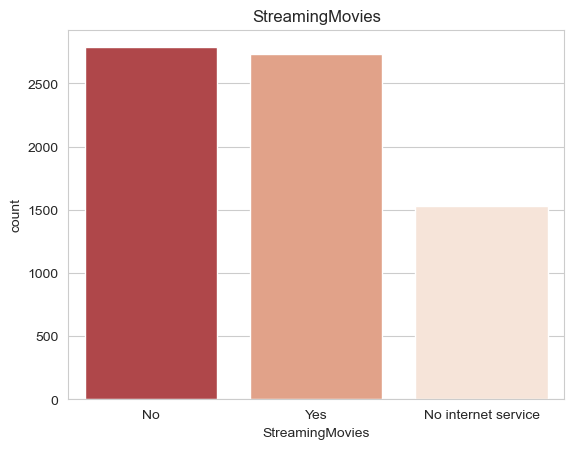

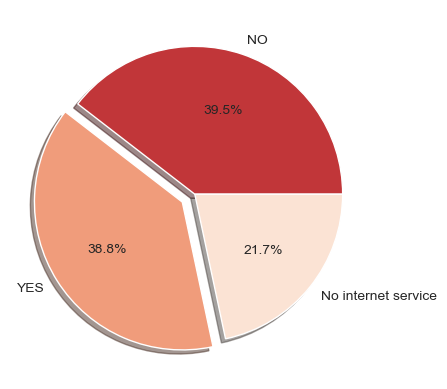

In [54]:
# visualized StreamingMovies column

# 1- create countplot 
sns.countplot(x = "StreamingMovies", data = data, order = data.StreamingMovies.value_counts().index)
sns.set_style("whitegrid")
plt.title("StreamingMovies")
plt.show()

# 2- create pie chere
movies = data.StreamingMovies.value_counts().tolist()
categorical  = ["NO", "YES", "No internet service"]
plt.pie(movies, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0,0.1,0])
plt.show()

- #### Most customer don't Streaming Movies

### Discovering `Contract` column

In [55]:
# show unique values

data["Contract"].unique()

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [56]:
# output value counts of each unique values

data["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

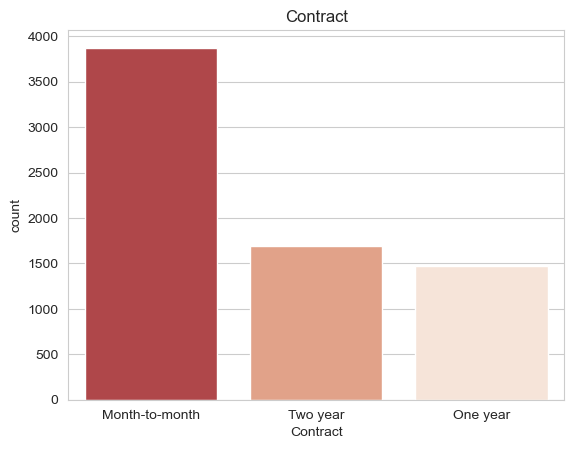

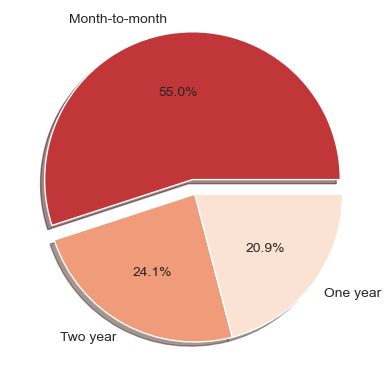

In [57]:
# visualized Contract column

# 1- create countplot 
sns.countplot(x = "Contract", data = data, order = data.Contract.value_counts().index)
sns.set_style("whitegrid")
plt.title("Contract")
plt.show()

# 2- create pie chere
Contract = data.Contract.value_counts().tolist()
categorical  = ["Month-to-month", "Two year", "One year"]
plt.pie(Contract, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0])
plt.show()

- #### Most customers  have a monthly contract

### Discovering `PaymentMethod` column

In [58]:
# show unique values

data["PaymentMethod"].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [59]:
# output value counts of each unique values

data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

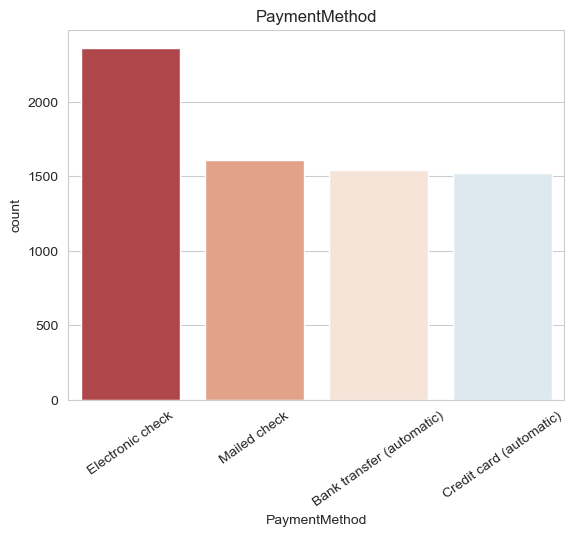

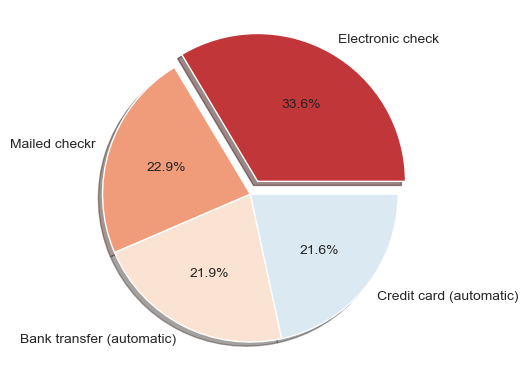

In [60]:
# visualized PaymentMethod column

# 1- create countplot 
sns.countplot(x = "PaymentMethod", data = data, order = data.PaymentMethod.value_counts().index)
plt.xticks(rotation = 35)
sns.set_style("whitegrid")
plt.title("PaymentMethod")
plt.show()

# 2- create pie chere
method = data.PaymentMethod.value_counts().tolist()
categorical  = ["Electronic check", "Mailed checkr", "Bank transfer (automatic)", "Credit card (automatic)"]
plt.pie(method, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0,0, 0])
plt.show()

- #### Most customer has Electronic check payment method

### Discovering `Churn` column

In [61]:
# show unique values

data["Churn"].unique()

array(['No', 'Yes'], dtype=object)

In [62]:
# output value counts of each unique values

data["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

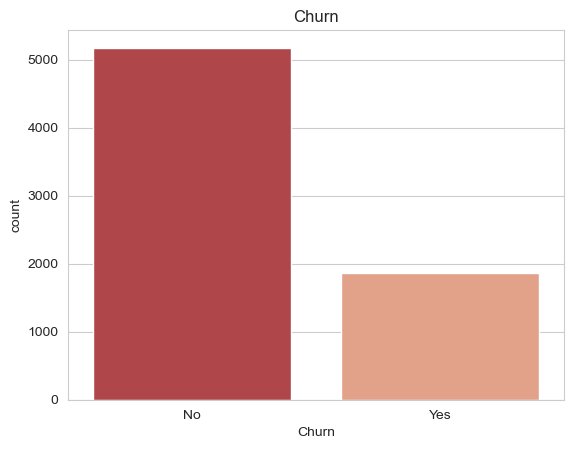

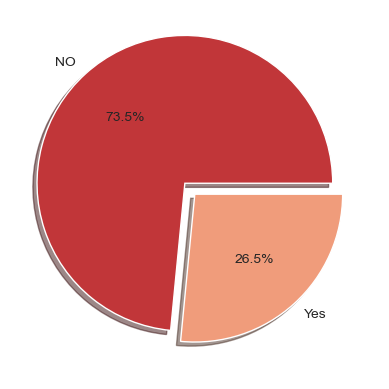

In [63]:
# visualized Churn column

# 1- create countplot 
sns.countplot(x = "Churn", data = data, order = data.Churn.value_counts().index)
sns.set_style("whitegrid")
plt.title("Churn")
plt.show()

# 2- create pie chere
Churn = data.Churn.value_counts().tolist()
categorical  = ["NO", "Yes"]
plt.pie(Churn, labels = categorical, shadow = True, autopct = "%1.1f%%", explode = [0.1,0])
plt.show()

- #### Most customer not churned

In [64]:
# get all Numerical datatype columns

# 1- convert TotalCharges type to numeric
data["TotalCharges"] = pd.to_numeric(data.TotalCharges, errors = "coerce")

# 2- # fill '' value with mean 

data["TotalCharges"].fillna(data.TotalCharges.mean(),inplace = True)

# 3- get all columns
numeColumns = data.select_dtypes(include = "number").columns.tolist()

# 4- show Numerical columns
numeColumns

['tenure', 'MonthlyCharges', 'TotalCharges']

### Discovering `tenure` column

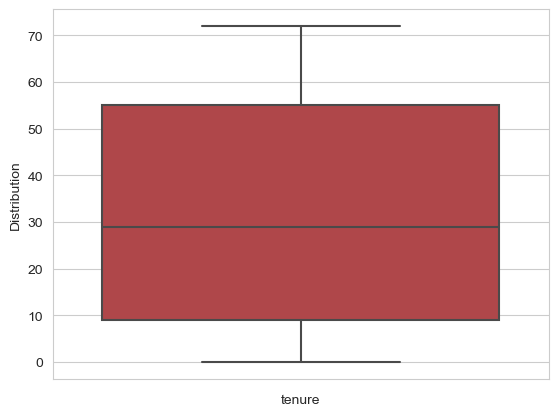

In [66]:
sns.boxplot(y = "tenure", data = data)
plt.xlabel("tenure")
plt.ylabel("Distribution")
plt.show()

In [67]:
# replace zero to mean 

average = data["tenure"].mean()
data.loc[data["tenure"] == 0, "tenure"] = average

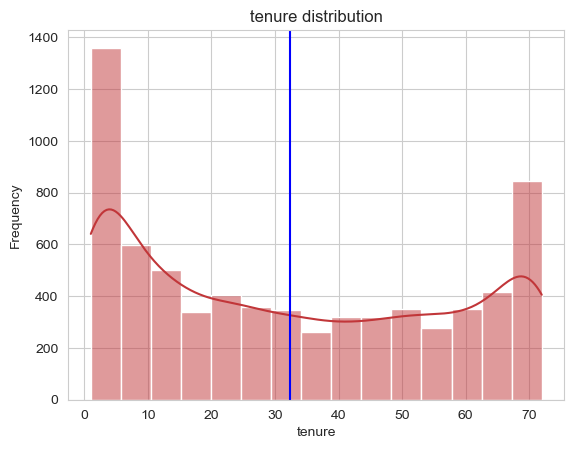

In [70]:
# visualized tenure column

sns.histplot(x = "tenure", data = data, kde = True)
plt.title("tenure distribution")
plt.axvline(data.tenure.mean(), color = "b")
plt.ylabel("Frequency")
plt.show()

- #### Most customer’s tenure one month

### Discovering `MonthlyCharges` column

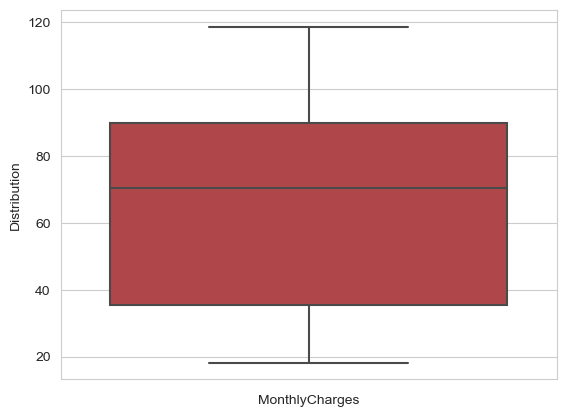

In [71]:
sns.boxplot(y = "MonthlyCharges", data = data)
plt.xlabel("MonthlyCharges")
plt.ylabel("Distribution")
plt.show()

- #### Females is greater than Male  Monthly Charges

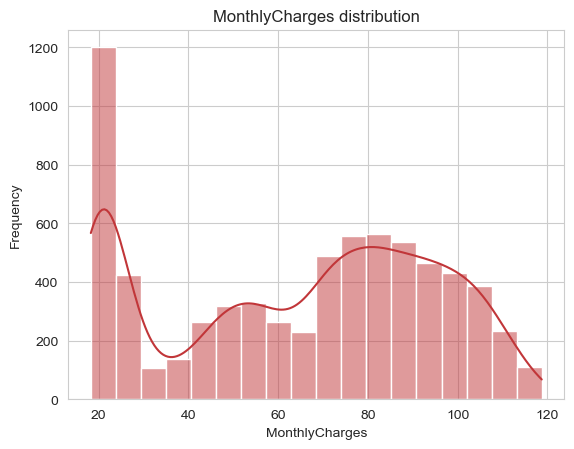

In [84]:
# visualized MonthlyCharges column

sns.histplot(x = "MonthlyCharges", data = data, kde = True)
plt.title("MonthlyCharges distribution")
plt.ylabel("Frequency")
plt.show()

### Discovering `TotalCharges` column

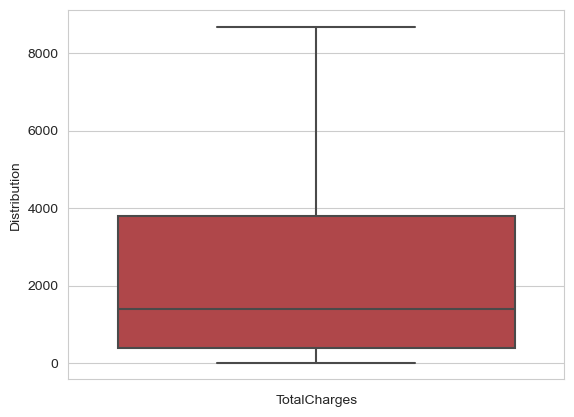

In [85]:
sns.boxplot(y = "TotalCharges", data = data)
plt.xlabel("TotalCharges")
plt.ylabel("Distribution")
plt.show()

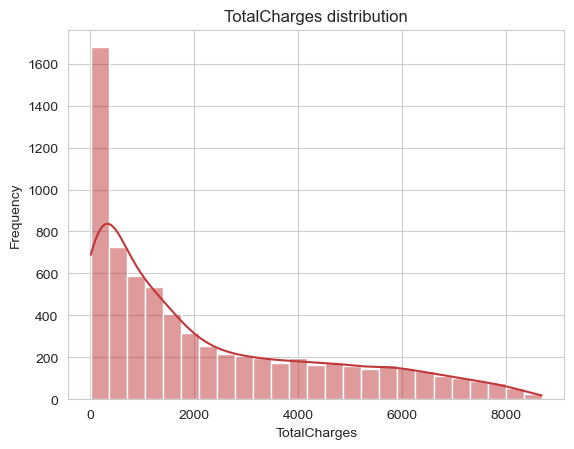

In [86]:
# visualized TotalCharges column

sns.histplot(x = "TotalCharges", data = data, kde = True)
plt.title("TotalCharges distribution")
plt.ylabel("Frequency")
plt.show()

# Bivariate Analysis
- ### Categorical column

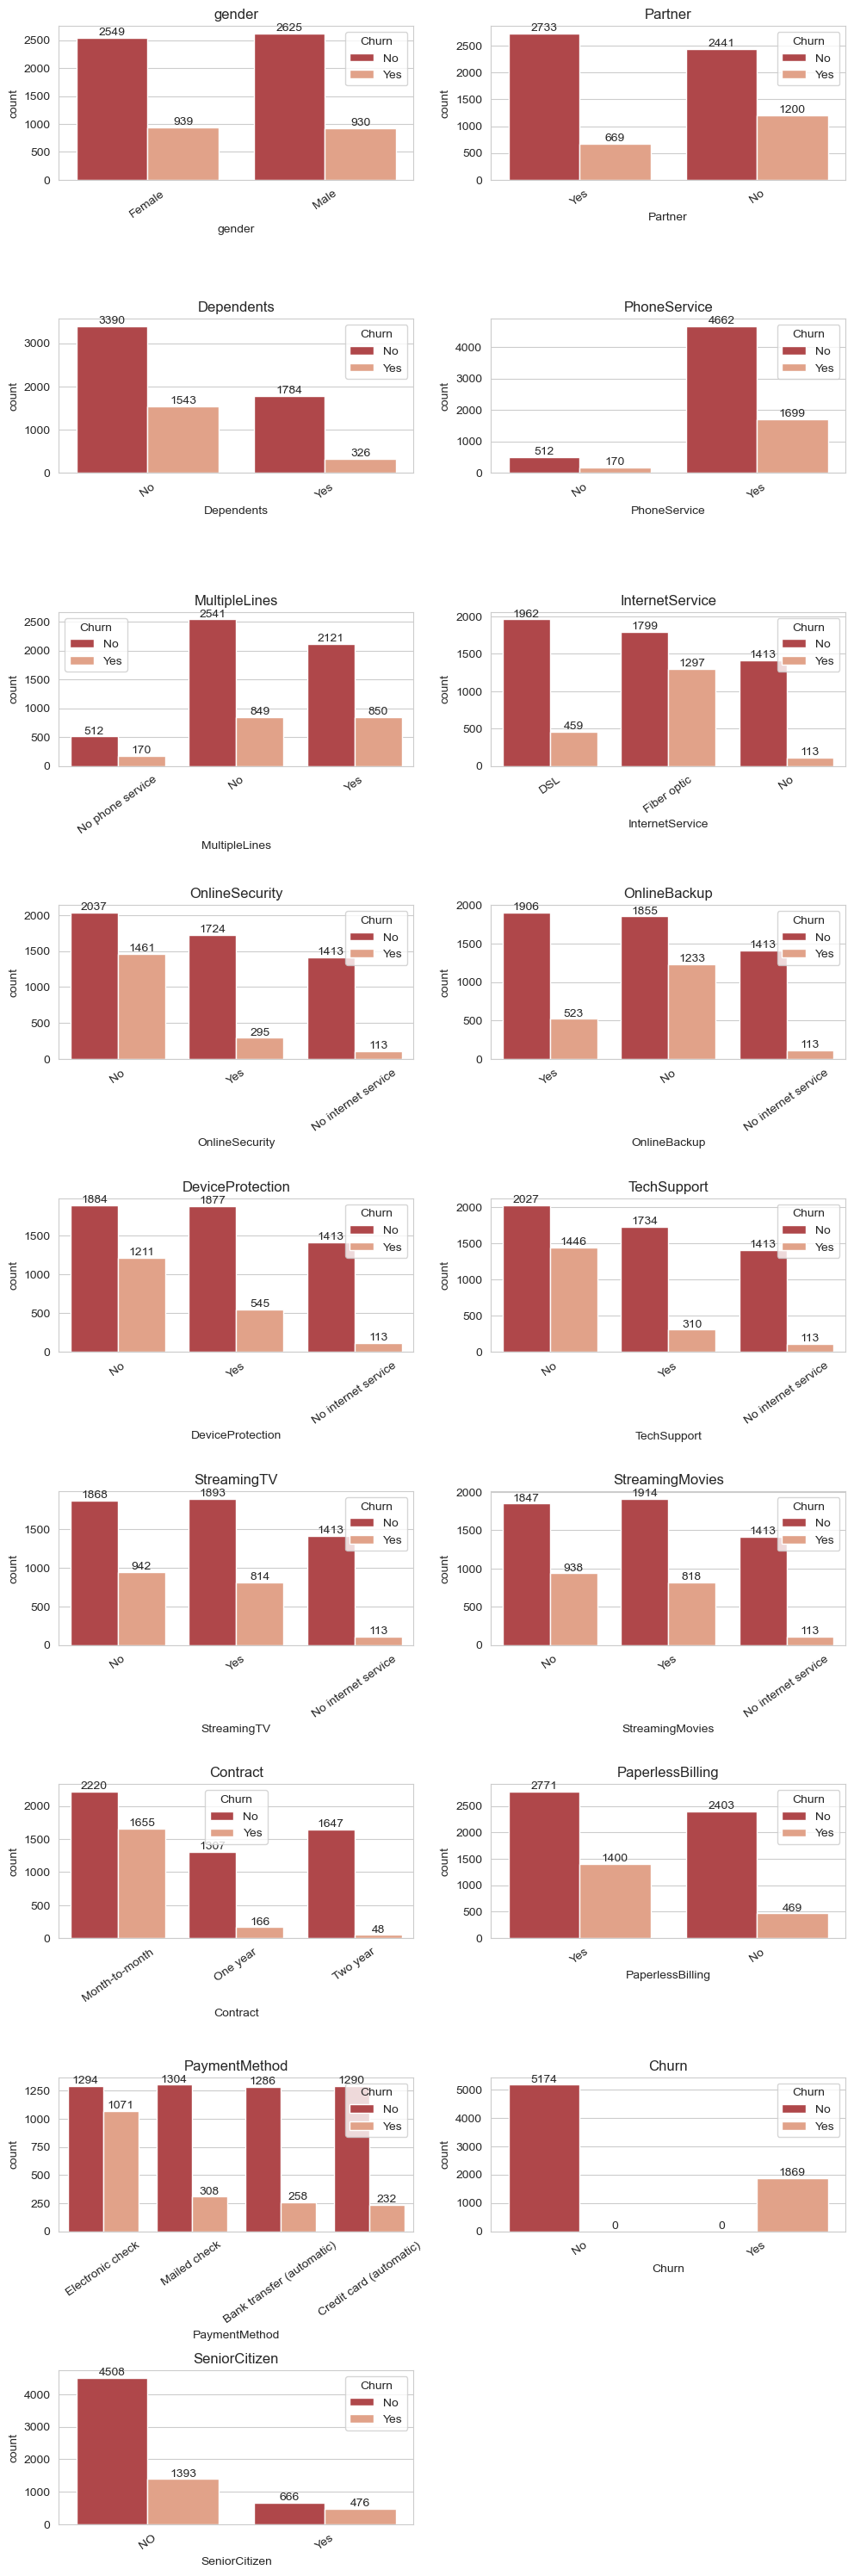

In [81]:

objColumns = data.select_dtypes(object).columns.tolist()
objColumns.append("SeniorCitizen")
#1- set figure size
plt.figure(figsize=(10, 30))

# 2- loop over objcolumns list to plot columns
for index, col in enumerate(objColumns):
    plt.subplot((len(objColumns) + 1) // 2, 2, index + 1)
    graph = sns.countplot(x = col, data = data, hue = "Churn")
    for container in graph.containers:
        graph.bar_label(container)
    
    plt.title(col) # set title to each plot
    plt.xticks(rotation = 35)

# 3- set layout between two plots
plt.tight_layout(pad = 1)
plt.show()


## Conclusion

- ### Customers who left within the last month `1839`
- Most of them were `Female`
- Most of them were young not `Senior Citizen`
- Most of them don't have a `partner`
- Most of them `over 18 years`(has no dependents)
- Most of them have `phone service`
- Most of them have `multiple lines`
- Most of them have `fiber optic` internet service(`DSL` is best service)
- Most of them saw that the internet is `not secure`
- Most of them don't have `online backup`
- Most of them don't have `device protection`
- Most of them don't have `tech support`
- Most of them don't have `streaming TV`
- Most of them don't have `streaming movies`
- Most of them have `monthly contract`(long contract period, less customer left)
- Most of them have `Electronic check`  payment method